# Basic regression: use case "Pillar mat failure"


### Use seaborn for pairplot
!pip install -q seaborn

### Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

## This example uses the tf.keras API, see this guide for details.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.1.0


In [3]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

## The dataset
- The dataset is available from the UCI Machine Learning Repository.

### Get the data

In [4]:
#dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

dataset_path = pd.read_csv('F:\\CON_2019_HMC_PGD-MINESET\\First_model\\INPUT-OUTPUT_scalarQoI_ML.csv')
dataset_path

,HLAYER01,HLAYER02,HLAYER03,HLAYER04,HLAYER05,HLAYER06,HLAYER07,HLAYER08,HLAYER09,HLAYER10,...,MIN_AREA,disp_head,disp_shoulder,disp_abdomen,disp_pelvis,vel_head,vel_shoulder,vel_abdomen,vel_pelvis,contact_force
0,1400,1400,1400,1400,1400,1400,1400,1400,1400,1400,...,7950.0,54.796516,83.558876,92.504295,77.868317,4622.324219,5561.645020,4758.399414,6008.744141,68311.07813
1,1180,1180,590,780,1180,980,1180,980,1180,780,...,6240.0,54.716702,82.570511,90.412773,79.546539,4155.486328,4841.047852,4717.323242,6711.025391,68848.75000
2,1400,980,1180,780,1180,1180,590,780,980,1180,...,4970.0,49.817577,75.497246,83.879334,68.540085,2853.571777,4197.498535,4683.327148,9928.053711,71796.92188
3,1400,980,780,1180,590,1400,590,1180,780,1180,...,1700.0,51.663673,73.737045,76.935959,59.588707,3234.094727,4271.544434,4751.420410,3803.425537,75984.48438
4,780,1400,1400,1400,780,1180,1400,780,1180,1400,...,3480.0,52.348984,76.556374,82.092598,64.370018,3125.223389,4284.444336,4648.498535,4288.382813,68299.07813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,980,780,980,780,780,1180,980,980,1180,1180,...,1940.0,47.764347,70.292274,76.129356,62.949062,3078.956055,4518.318848,4658.325195,5630.088867,72256.42188
2476,980,1400,1400,1180,1180,780,780,1180,780,1180,...,4150.0,53.812027,79.591270,88.000801,70.892410,3394.452148,4967.264160,5477.127930,12164.961910,68114.25000
2477,980,780,1180,1180,980,980,980,590,1180,590,...,4350.0,49.586273,74.695992,82.402206,66.263359,3061.417969,4310.328613,4647.989258,7219.560059,68486.71875
2478,590,780,1180,780,1400,780,1180,1400,980,780,...,2630.0,48.762264,72.921761,80.725662,68.111374,2829.952637,4211.761230,4527.034668,5932.657227,74516.14844


In [5]:
column_names = ['HLAYER01','HLAYER02','HLAYER03','HLAYER04','HLAYER05','HLAYER06','HLAYER07','HLAYER08','HLAYER09','HLAYER10','HLAYER11','HLAYER12','HLAYER13','HLAYER14','HLAYER15','HLAYER16','HLAYER17','HLAYER18','HLAYER19','HLAYER20','HLAYER21','HLAYER22','HLAYER23','L02_CNR','L02_FLG','L02_WALL','L03_CNR','L03_FLG','L03_WALL','L04_CNR','L04_FLG','L04_WALL','L05_CNR','L05_FLG','L05_WALL','L06_CNR','L06_FLG','L06_WALL','L07_CNR','L07_FLG','L07_WALL','L08_CNR','L08_FLG','L08_WALL','L09_CNR','L09_FLG','L09_WALL','L10_CNR','L10_FLG','L10_WALL','L11_CNR','L11_FLG','L11_WALL','L12_CNR','L12_FLG','L12_WALL','MIN_AREA']
dataset = dataset_path.loc[:,column_names]
#dataset = raw_dataset
#dataset = dataset_path
dataset.head()

,HLAYER01,HLAYER02,HLAYER03,HLAYER04,HLAYER05,HLAYER06,HLAYER07,HLAYER08,HLAYER09,HLAYER10,...,L10_CNR,L10_FLG,L10_WALL,L11_CNR,L11_FLG,L11_WALL,L12_CNR,L12_FLG,L12_WALL,MIN_AREA
0,1400,1400,1400,1400,1400,1400,1400,1400,1400,1400,...,1400,1400,1400,1400,1400,1400,1400,1400,1400,7950.0
1,1180,1180,590,780,1180,980,1180,980,1180,780,...,1400,980,1400,980,1180,780,590,1400,1180,6240.0
2,1400,980,1180,780,1180,1180,590,780,980,1180,...,590,1400,780,1180,1180,980,590,1180,780,4970.0
3,1400,980,780,1180,590,1400,590,1180,780,1180,...,1180,780,780,780,780,980,780,590,1180,1700.0
4,780,1400,1400,1400,780,1180,1400,780,1180,1400,...,780,780,980,1180,590,780,980,780,590,3480.0


## Clean the data
- The dataset contains a few unknown values.

### 누락 데이터 포착 
#### isnull() or isna()
- 데이터프레임의 isnull 또는 isna 메서드를 사용하면 누락 데이터의 위치를 알 수 있다.
- 데이터가 많은 경우에는 일일히 볼 수 없으므로 sum 명령으로 누락데이터의 갯수를 셀 수 있다.

isnull().sum()  or isna().sum

In [6]:
dataset.isna().sum()

HLAYER01    0
HLAYER02    0
HLAYER03    0
HLAYER04    0
HLAYER05    0
HLAYER06    0
HLAYER07    0
HLAYER08    0
HLAYER09    0
HLAYER10    0
HLAYER11    0
HLAYER12    0
HLAYER13    0
HLAYER14    0
HLAYER15    0
HLAYER16    0
HLAYER17    0
HLAYER18    0
HLAYER19    0
HLAYER20    0
HLAYER21    0
HLAYER22    0
HLAYER23    0
L02_CNR     0
L02_FLG     0
L02_WALL    0
L03_CNR     0
L03_FLG     0
L03_WALL    0
L04_CNR     0
L04_FLG     0
L04_WALL    0
L05_CNR     0
L05_FLG     0
L05_WALL    0
L06_CNR     0
L06_FLG     0
L06_WALL    0
L07_CNR     0
L07_FLG     0
L07_WALL    0
L08_CNR     0
L08_FLG     0
L08_WALL    0
L09_CNR     0
L09_FLG     0
L09_WALL    0
L10_CNR     0
L10_FLG     0
L10_WALL    0
L11_CNR     0
L11_FLG     0
L11_WALL    0
L12_CNR     0
L12_FLG     0
L12_WALL    0
MIN_AREA    0
dtype: int64

#### missingno 패키지를 사용하면 누락데이터에 대한 시각화를 쉽게 할 수 있다. 


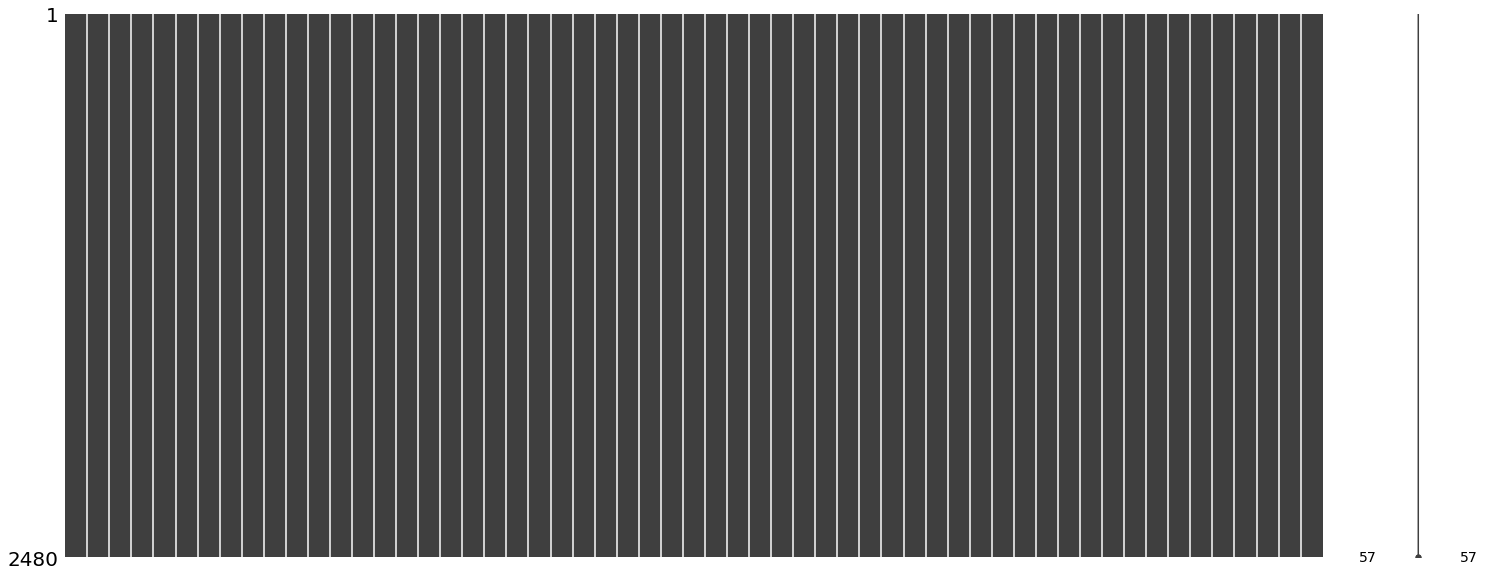

In [7]:
import missingno as msno

msno.matrix(dataset)
plt.show()

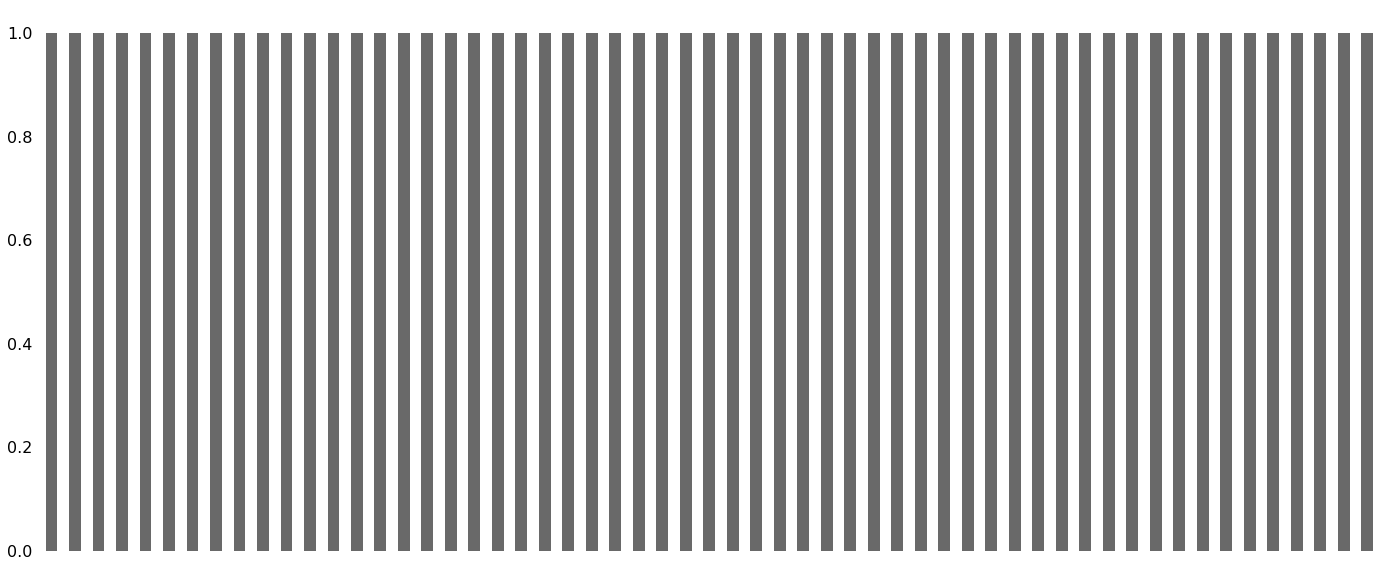

In [8]:
msno.bar(dataset)
plt.show()

### 누락 데이터 제거
-  dropna()명령을 사용하면 누락 데이터가 존재하는 행이나 열을 지울 수 있다.

In [9]:
dataset = dataset.dropna()

In [10]:
#dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [11]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,HLAYER01,HLAYER02,HLAYER03,HLAYER04,HLAYER05,HLAYER06,HLAYER07,HLAYER08,HLAYER09,HLAYER10,...,L10_CNR,L10_FLG,L10_WALL,L11_CNR,L11_FLG,L11_WALL,L12_CNR,L12_FLG,L12_WALL,MIN_AREA
2475,980,780,980,780,780,1180,980,980,1180,1180,...,1180,1180,980,980,980,1180,980,1180,1400,1940.0
2476,980,1400,1400,1180,1180,780,780,1180,780,1180,...,1180,1400,780,980,590,980,590,780,980,4150.0
2477,980,780,1180,1180,980,980,980,590,1180,590,...,980,780,1400,1400,780,780,980,780,1180,4350.0
2478,590,780,1180,780,1400,780,1180,1400,980,780,...,1180,590,590,980,590,1180,980,1180,590,2630.0
2479,780,980,1400,1400,980,1400,590,1180,780,1180,...,1180,1180,980,1180,590,980,1180,1400,780,6310.0


### Split the data into train and test
- train: 80%, test 20%

In [12]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

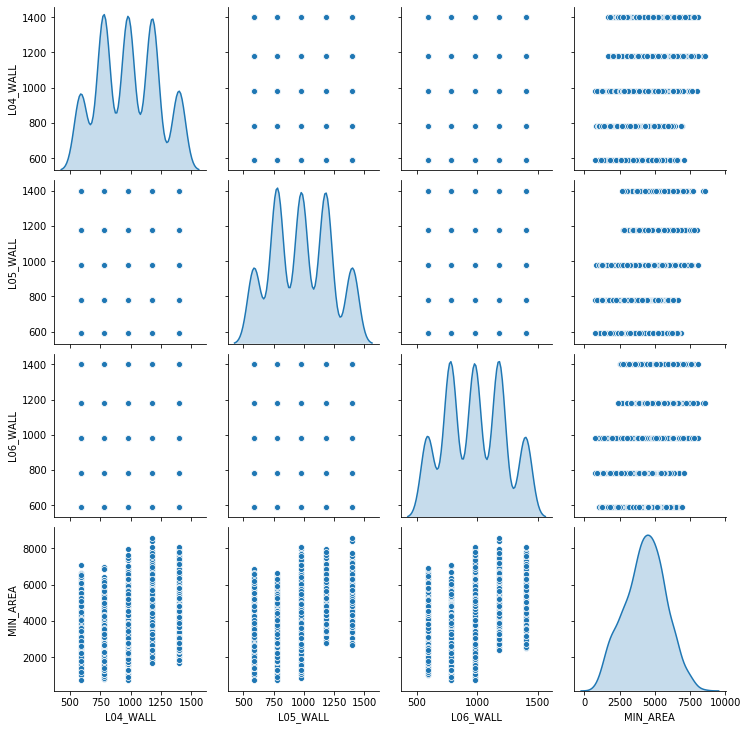

In [13]:
sns.pairplot(train_dataset[["L04_WALL", "L05_WALL", "L06_WALL", "MIN_AREA"]], diag_kind="kde")

### look at the overall statistics

In [14]:
train_stats = train_dataset.describe()
train_stats.pop("MIN_AREA")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
HLAYER01,1984.0,983.800403,248.218001,590.0,780.0,980.0,1180.0,1400.0
HLAYER02,1984.0,981.174395,246.397303,590.0,780.0,980.0,1180.0,1400.0
HLAYER03,1984.0,984.107863,246.374642,590.0,780.0,980.0,1180.0,1400.0
HLAYER04,1984.0,983.936492,248.087344,590.0,780.0,980.0,1180.0,1400.0
HLAYER05,1984.0,983.548387,246.932997,590.0,780.0,980.0,1180.0,1400.0
HLAYER06,1984.0,984.475806,249.085928,590.0,780.0,980.0,1180.0,1400.0
HLAYER07,1984.0,982.585685,247.802277,590.0,780.0,980.0,1180.0,1400.0
HLAYER08,1984.0,988.119960,249.229460,590.0,780.0,980.0,1180.0,1400.0
HLAYER09,1984.0,986.159274,248.781735,590.0,780.0,980.0,1180.0,1400.0
HLAYER10,1984.0,983.291331,248.678816,590.0,780.0,980.0,1180.0,1400.0


### "Split features from labels"
- Separate the target value, or "label", from the features. This label is the value that you will train the model to predict.

In [15]:
train_labels = train_dataset.pop('MIN_AREA')
test_labels = test_dataset.pop('MIN_AREA')

### Normalize the data
- Look again at the train_stats block above and note how different the ranges of each feature are.
- It is good practice to normalize features that use different scales and ranges. 
- Although the model might converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input.

In [16]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

### Build the model
- Let's build our model. Here, we'll use a Sequential model with two densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

#### tf.keras.Model.compile

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
- optimizer: 훈련 과정을 설정합니다. tf.keras.optimizers.Adam이나 tf.keras.optimizers.SGD와 같은 tf.keras.optimizers 아래의 옵티마이저 객체를 전달합니다. 기본 매개변수를 사용할 경우 'adam'이나 'sgd'와 같이 문자열로 지정할 수도 있습니다.
- loss: 최적화 과정에서 최소화될 손실 함수(loss function)를 설정합니다. 평균 제곱 오차(mse)와 categorical_crossentropy, sparse_categorical_crossentropy, binary_crossentropy 등이 자주 사용됩니다. 손실 함수의 이름을 지정하거나 tf.keras.losses 모듈 아래의 호출 가능한 객체를 전달할 수 있습니다.
- metrics: 훈련을 모니터링하기 위해 사용됩니다. 이름이나 tf.keras.metrics 모듈 아래의 호출 가능한 객체입니다.

In [17]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape'])


  return model

In [18]:
model = build_model()

### Inspect the model

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3648      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 7,873
Trainable params: 7,873
Non-trainable params: 0
_________________________________________________________________


#### Take a batch of 10 examples from the training data and call model.predict on it.

- model.predict

In [20]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.05318835],
       [ 0.27331412],
       [-0.7627182 ],
       [-0.80364263],
       [-0.25189382],
       [ 0.10553686],
       [-1.0118831 ],
       [-0.27999997],
       [ 0.62593734],
       [ 0.48254743]], dtype=float32)

### Train the model
- 1000 epochs
#### epoch
- 한 번의 epoch는 인공 신경망에서 전체 데이터 셋에 대해 forward pass/backward pass 과정을 거친 것을 말함. 즉, 전체 데이터 셋에 대해 한 번 학습을 완료한 상태

In [21]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:20834458.7070,  mae:4332.9897,  mape:99.8158,  mse:20834456.0000,  val_loss:20354316.0000,  val_mae:4264.7285,  val_mape:99.5759,  val_mse:20354318.0000,  
....................................................................................................
Epoch: 100, loss:476286.2312,  mae:549.7349,  mape:15.8188,  mse:476286.2188,  val_loss:1057589.6987,  val_mae:816.4540,  val_mape:23.8669,  val_mse:1057589.7500,  
....................................................................................................
Epoch: 200, loss:310865.0084,  mae:442.3185,  mape:12.6366,  mse:310864.9375,  val_loss:1159900.9578,  val_mae:849.9291,  val_mape:25.1310,  val_mse:1159901.0000,  
....................................................................................................
Epoch: 300, loss:193078.8640,  mae:347.1411,  mape:9.8077,  mse:193078.8281,  val_loss:1287798.2094,  val_mae:885.2576,  val_mape:26.0816,  val_mse:1287798.1250,  
...............................

In [22]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
995,467.186775,16.821209,467.186676,0.418845,1.750154e+06,1023.351440,1750153.875,29.622099,995
996,444.412101,16.522079,444.412048,0.414918,1.742951e+06,1021.386475,1742951.000,29.456219,996
997,489.830965,17.082115,489.830933,0.431803,1.750438e+06,1023.572754,1750438.250,29.611675,997
998,458.631564,16.751387,458.631592,0.422670,1.738510e+06,1018.808105,1738510.000,29.366331,998
999,427.756492,16.000959,427.756409,0.402357,1.746105e+06,1021.809448,1746104.750,29.568663,999


In [23]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MIN_AREA]')

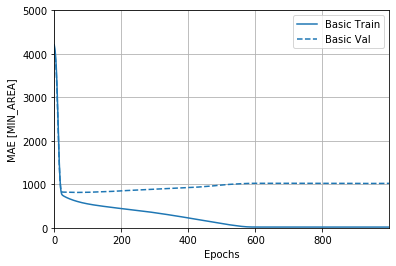

In [24]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 5000])
plt.ylabel('MAE [MIN_AREA]')

Text(0, 0.5, 'MSE [MIN_AREA^2]')

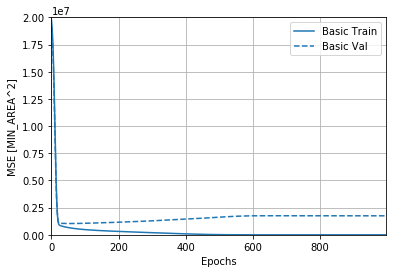

In [25]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20000000])
plt.ylabel('MSE [MIN_AREA^2]')

In [26]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:20824983.4997,  mae:4331.8892,  mape:99.7843,  mse:20824986.0000,  val_loss:20347698.9068,  val_mae:4263.8608,  val_mape:99.5485,  val_mse:20347698.0000,  
...........................................

Text(0, 0.5, 'MAE [MIN_AREA]')

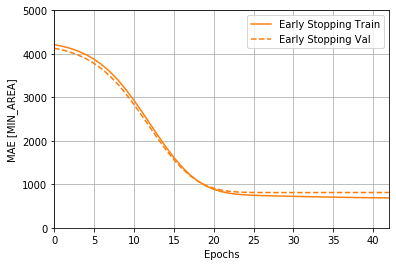

In [27]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 5000])
plt.ylabel('MAE [MIN_AREA]')

In [28]:
loss, mae, mse, mape = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MIN_AREA".format(mae))

496/496 - 0s - loss: 973725.9879 - mae: 793.3148 - mse: 973725.8750 - mape: 22.0883
Testing set Mean Abs Error: 793.31 MIN_AREA


### Make predictions
- predict MIN_AREA values using data in the testing set

In [29]:
#dataset2_path = pd.read_csv('F:\\CON_2019_HMC_PGD-MINESET\\First_model\\New_Testing_Matrix.csv')

#dataset2 = dataset2_path.loc[:,column_names]

#test_dataset = dataset2.drop(test_dataset.index)
#test_labels = test_dataset.pop('MIN_AREA')
#normed_test_data = norm(test_dataset)
#dataset.tail()


In [30]:
#dataset2.tail()

In [31]:
test_predictions = model.predict(normed_test_data).flatten()

print(test_predictions)


[11545.574   2753.708   2523.5796  3139.5513  2952.2397  2422.605
  4851.7524  4423.975   3603.774   4085.441   6120.0513  5276.653
  4502.9507  3700.1318  2995.8074  3990.4614  4343.35    6452.6333
  4193.769   2876.4985  2593.2544  3566.586   3373.3113  3099.91
  2641.0352  3916.3962  2470.7065  2832.9072  3959.2559  3548.4175
  5371.3804  3524.353   3458.6953  4474.356   3449.6953  3055.014
  3924.253   2875.8745  5320.8955  3001.6904  3093.8586  4514.903
  3222.1536  2600.171   3679.5566  4143.8735  4087.19    4532.619
  4909.0747  4784.4175  5088.294   4711.971   1422.255   3615.1145
  4799.348   5817.614   4790.715   5633.9946  3654.4521  4040.4192
  3191.4932  3713.0771  4918.5493  4466.24    4516.7515  3718.3198
  5706.4116  3627.167   4983.6074  1874.2025  2724.6514  4539.925
  3803.3188  5328.859   4019.7852  5676.851   4216.946   3146.5396
  6091.2534  3442.87    2474.9043  3834.2917  2920.391   6034.9214
  4226.354   4522.854   2743.9307  5296.947   4927.6704  4228.4663
  1

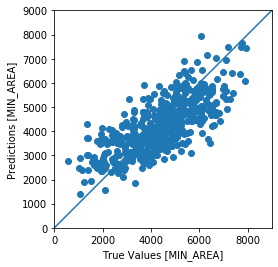

In [32]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MIN_AREA]')
plt.ylabel('Predictions [MIN_AREA]')
lims = [0, 9000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

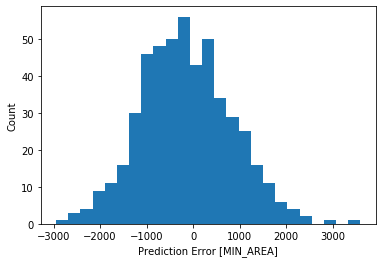

In [33]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MIN_AREA]")
_ = plt.ylabel("Count")

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                3648      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 7,873
Trainable params: 7,873
Non-trainable params: 0
_________________________________________________________________
